<div style="padding: 30px 25px; border: 2px #6495ed solid">
    
<b>Привет, Михаил!</b>

Меня зовут Алексей Косенко, и я буду проверять твой проект.
    
Предлагаю общаться на «<b>ты</b>», но если это неудобно — обязательно сообщи об этом.
    
Ниже ты увидишь мои комментарии, выделенные разным цветом:
    
<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

<b>Отлично!</b> ✔️: все ок, продолжай в том же духе :)

</div>
<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
<b>Есть совет</b> ⚠️: так выделены некритичные замечания или советы, которые смогут улучшить твой проект.

</div>
<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

<b>Нужно доработать</b> ❌: так выделены важные замечания — без их исправления проект не может быть принят.
    
</div>

Будет здорово, если ты будешь участвовать в диалоге, а свои вопросы, комментарии и изменения в проекте тоже будешь выделять, например, вот так:
    
<div class="alert alert-info">
    <b>Комментарий студента:</b> твой комментарий
</div>
    
Пожалуйста, не перемещай и не удаляй мои комментарии, это усложнит повторную проверку.
    
</div>

<div style="padding: 30px 25px; border: 2px #6495ed solid">
    
<b>Еще раз привет!</b>

Спасибо, что доделал работу, оформление комментариев остается тем же, только обозначим номер итерации: v2
    
</div>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

In [1]:
!pip install scikit-learn --upgrade

In [2]:
import sklearn
sklearn.__version__

'1.1.3'

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle

In [4]:
RANDOM_STATE = 42

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: все импорты в одном месте, удобно :) Хорошо, что выносишь сид в константу!</div>

## Подготовка данных

In [5]:
data = pd.read_csv(
    '/datasets/Churn.csv',
    dtype={
        'Surname': 'category',
        'Geography': 'category',
        'Gender': 'category',
    },
)
data = data.drop('RowNumber', axis=1)
data = data.rename(columns={
    'CustomerId': 'customer_id',
    'Surname': 'surname',
    'CreditScore': 'credit_score',
    'Geography': 'geography',
    'Gender': 'gender',
    'Age': 'age',
    'Tenure': 'tenure',
    'Balance': 'balance',
    'NumOfProducts': 'num_of_products',
    'HasCrCard': 'has_cr_card',
    'IsActiveMember': 'is_active_member',
    'EstimatedSalary': 'estimated_salary',
    'Exited': 'exited',
})
data.head()

,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: окей, молодец, что переименовываешь с помощью словаря, при изменении набора колонок переименуются только те, которые присутствуют в датасете</div>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customer_id       10000 non-null  int64   
 1   surname           10000 non-null  category
 2   credit_score      10000 non-null  int64   
 3   geography         10000 non-null  category
 4   gender            10000 non-null  category
 5   age               10000 non-null  int64   
 6   tenure            9091 non-null   float64 
 7   balance           10000 non-null  float64 
 8   num_of_products   10000 non-null  int64   
 9   has_cr_card       10000 non-null  int64   
 10  is_active_member  10000 non-null  int64   
 11  estimated_salary  10000 non-null  float64 
 12  exited            10000 non-null  int64   
dtypes: category(3), float64(3), int64(7)
memory usage: 908.0 KB


In [7]:
data.describe()

,customer_id,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
count,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Выбросим столбец `surname`: это явно не признак для обучения.

In [8]:
data = data.drop('surname', axis=1)

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: согласен, фамилия для моделей будет неинформативна</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: а как нам поможет `customer_id`?</div>

<div class="alert alert-info">
<h2>Комментарий студента <a class="tocSkip"> </h2>

Мой косяк, забыл удалить

</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

In [9]:
data = data.drop('customer_id', axis=1)

Бинарная классификация на табличных данных -> используем RandomForestClassifier.  
(Хорошо бы какой-нибудь GBDT, например, CatBoost, но пока мы подобные модели не проходили)

Для моделей на DT масштабирование не требуется, его проводить и не будем.

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: для древесных классификаторов масштабирование действительно не обязательно, здорово, что ты это знаешь!</div>

Есть пропуски в признаке `tenure`. А RandomForestClassifier не умеет их обрабатывать. Заменим их на `-1`.

In [10]:
data['tenure'] = data['tenure'].replace({np.NaN: -1})

<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: при заполнении пропусков необходимо помнить, что данные должны оставаться адекватными, приближенными к исходным значениям, а распределение не должно исказиться. Поэтому не очень понятно, в чем смысл заполнения `-1`, нужна дополнительная аргументация</div>

<div class="alert alert-info">
<h2>Комментарий студента <a class="tocSkip"> </h2>

Смысл в том, чтобы значение для точек, у которых был пропуск, выбрать таким образом, чтобы оно было с краю. Например, у нас в признаке `tenure` было минимальное значение `0`. А для пропусков заполняем `-1`.

</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: не согласен, и вот почему:
1. Если ты считаешь, что на месте пропусков должно быть значение, которое не встречается в датасете, то это нужно как-то аргументировать: например, сравнив характеристики распределений остальных признаков в выборке с пропусками и в выборке с остальными данными. Если на месте пропусков действительно должно быть новое значение, то распределения будут отличаться.
2. Заполнив пропуски значением с краю, можно заметно исказить исходное распределение, тогда модель может выучить несуществующие зависимости
3. Не очень понятно, как именно трактовать отрицательное количество лет обслуживания
    
Вообще способов заполнения пропусков много, а какой из них выбрать — однозначного ответа нет, это зависит от наших данных. Но можно придерживаться примерно такого алгоритма:
* Если есть возможность, то, конечно, лучше выяснить природу этих пропусков, в реальных данных чаще всего это можно выяснить либо у коллег, либо на ресурсах, откуда ты берешь эти данные, либо просто по контексту и знанию предметной области.
* Если же такой возможности нет, то можно попробовать поискать корреляцию с другими признаками, сгруппировать данные по этим признакам и заполнить медианой/средним по группам.
* Если и тут все глухо, то можно заполнить и медианой/средним по всему признаку, если есть уверенность, что распределение не исказится. Для этого можно сравнить основные характеристики распределения(mean, std, median) до и после заполнения.
* На крайний случай, если пропусков не очень много, можно заполнить пропуски случайными значениями, задав вероятности равными частоте в исходном признаке. Тут будет полезен <a href="https://www.w3schools.com/python/ref_random_choices.asp" target="blank_">random.choices</a>. В параметр `weights` можно передать результат `value_counts(normalize=True)` для этого признака. А для самого заполнения можно использовать fillna.
* Иногда пропуски можно заполнить с помощью предсказаний моделей, сделав этот признак целевым, либо, например, с помощью <a href="https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html">KNNImputer</a>
* Но если адекватного способа заполнения, который не противоречит логике данных и здравому смыслу, не находится, то остается только удалить эти пропуски, либо даже удалить весь признак целиком. Для того, чтобы узнать, как именно тот или иной признак влияет на обучение модели, можно посмотреть на **feature_importances**, то есть важность признаков для решения модели. Если важность очень мала, то при удалении метрики поменяются незначительно, а значит мы сможем оставить драгоценные данные с остальными полезными признаками
    
Подробнее про **feature_importances**:
* https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285
* https://medium.com/analytics-vidhya/feature-importance-explained-bfc8d874bcf
* https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
* https://christophm.github.io/interpretable-ml-book/feature-importance.html</div>

Категориальные признаки закодируем через OHE.

In [11]:
data = pd.get_dummies(data, columns=['gender', 'geography'], drop_first=True)
data.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,gender_Male,geography_Germany,geography_Spain
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1


<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: окей, OHE в этом случае подходит</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: при OHE кодировании признака `geography` также создается лишняя dummy-переменная, поэтому в этом случае также лучше передать параметр `drop_first=True`</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

## Исследование задачи

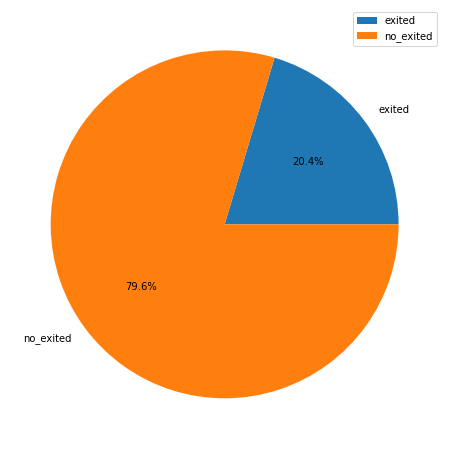

In [12]:
exited_size = (data['exited'] == 1).sum()
no_exited_size = (data['exited'] == 0).sum()

fig, ax = plt.subplots(figsize=(15, 8))

ax.pie([exited_size, no_exited_size], labels=['exited', 'no_exited'], autopct='%1.1f%%')
ax.legend()

plt.show()

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: жуткий дисбаланс!</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: но для наглядности помимо графика стоит добавить еще и численные значения, здесь поможет метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html" target="blank_">value_counts</a> с параметром `normalize=True`</div>

<div class="alert alert-info">
<h2>Комментарий студента <a class="tocSkip"> </h2>

Нашёл решение полаконичнее

</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: классно получилось :)</div>

In [13]:
y = data['exited']
X = data.drop('exited', axis=1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    stratify=y,
    random_state=RANDOM_STATE,
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    stratify=y_train,
    random_state=RANDOM_STATE,
)

<div class="alert alert-warning">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: как правило, для разделения на три выборки используют отношение 60/20/20. Это не обязательное условие, но если ты используешь другое разделение, стоит пояснить почему</div>

In [15]:
best_depth = None
best_f1 = -1
best_auc = None
for depth in range(2, 21):
    model = DecisionTreeClassifier(max_depth=depth, random_state=RANDOM_STATE)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_pred_prob = model.predict_proba(X_val)[:, 1]

    f1 = f1_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_pred_prob)

    print(f'глубина\t{depth},\tf1 {f1:.3},\tauc {auc:.3}')

    if best_f1 < f1:
        best_f1 = f1
        best_depth = depth
        best_auc = auc

print(f'Лучшая глубина\t{best_depth},\tf1 {best_f1:.3},\tauc {best_auc:.3}')

глубина	2,	f1 0.488,	auc 0.737
глубина	3,	f1 0.406,	auc 0.787
глубина	4,	f1 0.514,	auc 0.817
глубина	5,	f1 0.538,	auc 0.834
глубина	6,	f1 0.559,	auc 0.832
глубина	7,	f1 0.546,	auc 0.827
глубина	8,	f1 0.567,	auc 0.823
глубина	9,	f1 0.571,	auc 0.807
глубина	10,	f1 0.584,	auc 0.799
глубина	11,	f1 0.576,	auc 0.774
глубина	12,	f1 0.553,	auc 0.749
глубина	13,	f1 0.539,	auc 0.731
глубина	14,	f1 0.548,	auc 0.725
глубина	15,	f1 0.554,	auc 0.73
глубина	16,	f1 0.547,	auc 0.725
глубина	17,	f1 0.54,	auc 0.715
глубина	18,	f1 0.539,	auc 0.718
глубина	19,	f1 0.54,	auc 0.717
глубина	20,	f1 0.545,	auc 0.719
Лучшая глубина	10,	f1 0.584,	auc 0.799


In [16]:
best_depth = None
best_f1 = -1
best_auc = None
for depth in range(2, 21):
    model = RandomForestClassifier(max_depth=depth, n_jobs=-1, random_state=RANDOM_STATE)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_pred_prob = model.predict_proba(X_val)[:, 1]

    f1 = f1_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_pred_prob)

    print(f'глубина\t{depth},\tf1 {f1:.3},\tauc {auc:.3}')

    if best_f1 < f1:
        best_f1 = f1
        best_depth = depth
        best_auc = auc

print(f'Лучшая глубина\t{best_depth},\tf1 {best_f1:.3},\tauc {best_auc:.3}')

глубина	2,	f1 0.109,	auc 0.812
глубина	3,	f1 0.257,	auc 0.822
глубина	4,	f1 0.383,	auc 0.835
глубина	5,	f1 0.455,	auc 0.844
глубина	6,	f1 0.512,	auc 0.852
глубина	7,	f1 0.546,	auc 0.857
глубина	8,	f1 0.552,	auc 0.858
глубина	9,	f1 0.549,	auc 0.859
глубина	10,	f1 0.56,	auc 0.859
глубина	11,	f1 0.573,	auc 0.86
глубина	12,	f1 0.578,	auc 0.861
глубина	13,	f1 0.585,	auc 0.856
глубина	14,	f1 0.591,	auc 0.856
глубина	15,	f1 0.578,	auc 0.858
глубина	16,	f1 0.573,	auc 0.856
глубина	17,	f1 0.592,	auc 0.863
глубина	18,	f1 0.592,	auc 0.858
глубина	19,	f1 0.583,	auc 0.857
глубина	20,	f1 0.576,	auc 0.854
Лучшая глубина	17,	f1 0.592,	auc 0.863


<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: тут нужно разобраться подробнее, есть два подхода:
1. Разбить данные на три выборки: обучающую, валидационную и тестовую: на обучающей выборке нужно обучать модели, на валидационной — подбирать гиперпараметры и сравнивать метрики, а на тестовой проводить финальное тестирование;
2. Вместо выделения отдельной валидационной выборки можно использовать кросс-валидацию, подробнее про это расскажут в следующем спринте

В обоих случаях тестовая выборка используется только на этапе финального тестирования для проверки лучшей модели с подобранными гиперпараметрами и примененным способом борьбы с дисбалансом. Сравнивать модели(или способы борьбы с дисбалансом) на тестовой выборке категорически нельзя иначе она просто перестанет быть тестовой</div>

<div class="alert alert-info">
<h2>Комментарий студента <a class="tocSkip"> </h2>

Стоило наверное удалить это замечание, когда обнаружилось, что я уже использую кросс-валидацию

</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: теперь все окей!</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: не совсем понял, почему нужно было удалить это замечание, я его писал как раз после того, как увидел, что ты используешь кросс-валидацию :) А относится оно к тестовой выборке, которая в первой версии проекта у тебя использовалась для оценки моделей до выбора лучшей модели(в том числе на кросс-валидации), что делать некорректно.

Но при использовании <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html" target="blank_">GridSearchCV</a> валидационную выборку действительно можно не выделять как раз из-за встроенной кросс-валидации. Но тогда и все метрики на этом этапе необходимо рассчитывать на кросс-валидации. Если необходимо использовать несколько метрик, то в параметр `scoring` можно передать список метрик, но задать в параметр `refit` основную метрику, в нашем случае это F1. Тогда для получения метрик нужно использовать свойство `cv_results_`, необходимые столбцы в полученном словаре называются `mean_test_{название_метрики}`</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: для наглядности все таки стоит построить хотя бы ROC-кривую, а если необходимо обновить библитеку sklearn, то в начало проекта можно добавить `pip install scikit-learn --upgrade`</div>

Не понимаю, какие выводы нужны здесь.

- Лучший f1-score получается у модели на RandomForestClassifier с глубиной деревьев 17.
- Однако разница между лучшим RandomForestClassifier и DecisionTreeClassifier

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: для честного эксперимента стоит проверить и другие модели: решающее дерево, логистическую регрессию и т.д. </div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: а в промежуточных выводах, как правило, нужно описать, что было сделано на этом шаге, какие получились результаты и другие наблюдения, которые у тебя получилось заметить</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

## Борьба с дисбалансом

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: круто, что знаешь про stratify!</div>

<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: но стратификация не относится к борьбе с дисбалансом, поэтому правильнее будет вынести ее в первое разделение, а повторно разбивать выборки уже не нужно</div>

<div class="alert alert-info">
<h2>Комментарий студента <a class="tocSkip"> </h2>

Не могу согласиться с этим тезисом.  
    
В качестве аргумента кидаю [статью](https://machinelearningmastery.ru/practical-tips-for-class-imbalance-in-binary-classification-6ee29bcdb8a7/). Да, это кривенький перевод на русский, но факт, что в ней стратификация упоминается как метод борьбы с дисбалансом классов.

</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: здорово, что используешь дополнительные материалы! Можно изучить еще <a href="https://towardsdatascience.com/practical-tips-for-class-imbalance-in-binary-classification-6ee29bcdb8a7" target="blank_">оригинальную статью</a> и попробовать разобраться подробнее.

Использование стратификации гарантирует, что соотношение классов в выборках после разбиения останется примерно таким же, как и в исходной выборке(в нашем случае 4:1). Она действительно полезна при дисбалансе, особенно сильном: например, при определении спама, прогнозировании редких заболеваний или природных катаклизмов соотношение классов выборке может быть 1:10000 и более, тогда может возникнуть ситуация, что в одну из выборок не попадет ни одного объекта меньшего класса, там без стратификации никуда. Но и в остальных случаях она не делает ничего вредного, ведь чем лучше представлены оба класса во всех подвыборках, тем лучше модель сможет различать эти классы, а метрики будут более реалистичными, в статье говорится как раз об этом.
    
Так что методом борьбы с дисбалансом назвать ее нельзя, просто потому, что она не устраняет дисбаланс, а только сохраняет его в том же соотношении, что и в исходных данных. А также ее можно использовать всегда в задачах классификации, вне зависимости от факта дисбаланса</div>

С дисбалансом борюсь с помощью балансировки весов.

In [17]:
%%time
grid_search = GridSearchCV(
    RandomForestClassifier(
        class_weight='balanced',
        random_state=RANDOM_STATE,
    ),
    param_grid={
        'max_depth': list(range(2, 20)),
    },
    scoring='f1',
    n_jobs=-1,
    cv=StratifiedShuffleSplit(
        test_size=0.25,
        random_state=RANDOM_STATE,
    ),
)
grid_search.fit(X_train, y_train)

CPU times: user 1min 14s, sys: 247 ms, total: 1min 14s
Wall time: 1min 14s


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.25,
            train_size=None),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19]},
             scoring='f1')

In [18]:
print(grid_search.best_score_)

0.5962432673672675


<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: здорово, что знаешь про GridSearch!</div>

Есть ещё вариант балансировки через upsampling. Если делать, как учили на курсе, то есть тупо копированием точек данных класса, что меньше по объёму, то это сводиться к выше указанной балансировке через веса.  
Если балансировать через downsampling, опять же вариантом тупо случайной подвыборки точек данных класса, что больше, это очевидно снизит перфоманс модели.

Более сложные техники upsampling и downsampling выходят за рамки курса.

<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: не согласен, что upsampling сводится к взвешиванию классов, эти методы действуют по-разному: upsampling изменяет сами данные, когда взвешивание классов меняет только функцию потерь при обучении. Также не согласен, что downsampling обязательно снижает перфоманс модели, все зависит от качества и количества наших данных, этот метод также используется на практике.

Так что в этом проекте необходимо проверить еще хотя бы один способ борьбы с дисбалансом: upsampling, downsampling, изменение порога классификации. А алгоритм будет примерно следующим:
1. Обучить 2-3 выбранные тобой модели с подбором гиперпараметров без учета борьбы с дисбалансом и зафиксировать результаты в выводах;
2. Проверить 2-3 разных способа борьбы с дисбалансом для каждой модели, подобрать для каждой гиперпараметры и зафиксировать результаты в выводах
3. После этого нужно выбрать лучшую по F1-мере из этих моделей и уже ее проверить на тестовой выборке.
</div>

<div class="alert alert-info">
<h2>Комментарий студента <a class="tocSkip"> </h2>

Мне стоило упомянуть, что я говорил про методы на деревьях решений.  
    
Как используется функция потерь при обучении модели дерева решений?

</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: функция потерь есть для любой ML-модели, подробнее про это расскажут в спринте «Численные методы», а конкретно про дерево решений есть классная статья <a href="https://towardsdatascience.com/decision-tree-classifier-explained-in-real-life-picking-a-vacation-destination-6226b2b60575" target="blank_">здесь</a>

Но пока достаточно запомнить, что взвешивание классов штрафует объекты бОльшего класса, чтобы модель при обучении воспринимала оба класса одинаково важными</div>

In [19]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=RANDOM_STATE)
    
    return features_upsampled, target_upsampled

In [20]:
X_train, y_train = upsample(X_train, y_train, repeat=5)

<div class="alert alert-warning">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: суть функции upsample — увеличить количество строк положительного класса во столько раз, чтобы избавиться от дисбаланса классов в целевом признаке и прийти к соотношению классов примерно 1:1. Как раз за это отвечает параметр `repeat`, он подбирается на основе отношения классов в целевом признаке нашей текущей выборки, иначе ты просто заменяешь один дисбаланс другим :)</div>

In [21]:
%%time
grid_search = GridSearchCV(
    RandomForestClassifier(
        random_state=RANDOM_STATE,
    ),
    param_grid={
        'max_depth': list(range(2, 20)),
    },
    scoring='f1',
    n_jobs=-1,
    cv=StratifiedShuffleSplit(
        test_size=0.25,
        random_state=RANDOM_STATE,
    ),
)
grid_search.fit(X_train, y_train)

CPU times: user 1min 51s, sys: 840 ms, total: 1min 52s
Wall time: 1min 52s


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.25,
            train_size=None),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19]},
             scoring='f1')

In [22]:
print(grid_search.best_score_)

0.9594658121459088


<div class="alert alert-warning">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: вообще на upsample выборках нельзя проводить кросс-валидацию, потому что модель очень вероятно переобучится(что и произошло), <a href="https://datascience.xyz/practice/kak-delat-kross-validaciju-pri-apsemplinge-dannyh.html" target="blank_">тут</a> можно почитать про это подробнее. Лучшей стратегией будет отказаться от кросс-валидации для этой проверки, либо реализовать собственную кросс-валидацию, либо попробовать другие инструменты, как описано в статье</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: еще для наглядности не хватает таблички с результатами, где будет название модели, примененный способ борьбы с дисбалансом, лучшие гиперпараметры и значения метрик F1 и ROC-AUC</div>

## Тестирование модели

In [23]:
model = grid_search.best_estimator_

In [24]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

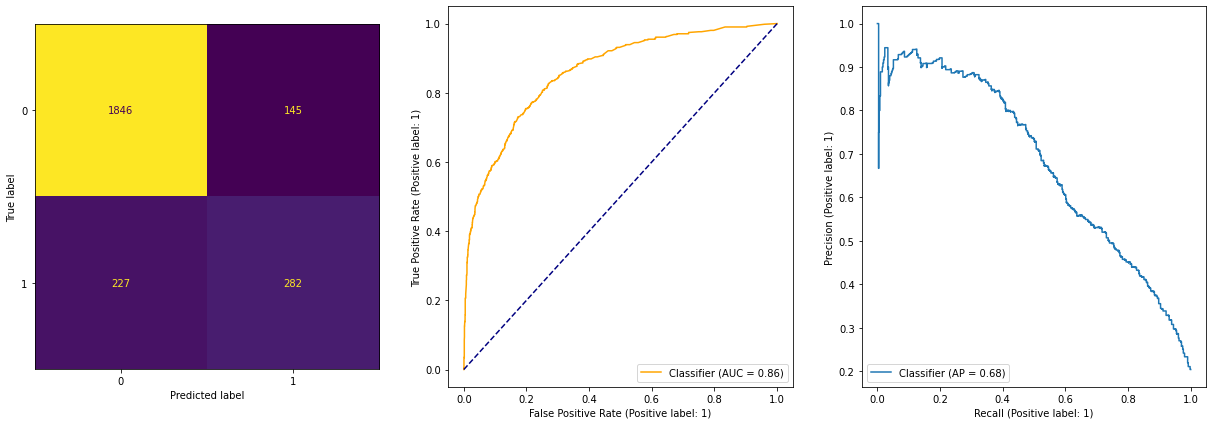

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1991
           1       0.66      0.55      0.60       509

    accuracy                           0.85      2500
   macro avg       0.78      0.74      0.76      2500
weighted avg       0.84      0.85      0.85      2500



In [25]:
fig, axes = plt.subplots(1, 3, figsize=(21, 7))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar=False, ax=axes[0])

RocCurveDisplay.from_predictions(y_test, y_pred_prob, color='orange', ax=axes[1])
axes[1].plot([0, 1], [0, 1], color='navy', linestyle='--')

PrecisionRecallDisplay.from_predictions(y_test, y_pred_prob, ax=axes[2])

plt.show()

print(classification_report(y_test, y_pred))

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: бейзлайн побит, ура!</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: не хватает итогового вывода: поясни вкратце, что было сделано в ходе проекта, и какие получились результаты</div>

- Рассмотрели в качестве базового классификатора DT и RF, выбрали RF
- Попробовали 2 варианта балансировки: через class_weights и upsampling. Лучше оказался upsampling
- Провели тестирование лучшей модели

<div style="padding: 20px 25px; border: 2px #6495ed solid">
    
<h2 style="color: #87187D">Итоговый комментарий ревьюера<a class="tocSkip"></a></h2>

Чистый и лаконичный проект, такие всегда приятно проверять, спасибо!
    
Но тебе обязательно нужно обратить внимание на следующее:
* убедись в наличии выводов и пояснений на каждом этапе;
* разбей данные на 3 выборки перед обучением моделей, повторно разбивать их уже не нужно;
* проверь еще хотя бы один способ борьбы с дисбалансом

Остальные комментарии можно найти в проекте. Готов ответить на любые вопросы :)

<b>Жду доработанный проект на повторное ревью! Удачи!</b>
        
</div>

<div style="padding: 20px 25px; border: 2px #6495ed solid">
    
<h2 style="color: #87187D">Итоговый комментарий ревьюера v2<a class="tocSkip"></a></h2>

Теперь то, что нужно, молодец!

Все критичные замечания исправлены, и теперь я могу принять твой проект

<b>Успехов в обучении!</b>
        
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: задача исследована
    - [ ]  Исследован баланс классов
    - [ ]  Изучены модели без учёта дисбаланса
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 3: учтён дисбаланс
    - [ ]  Применено несколько способов борьбы с дисбалансом
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 4: проведено тестирование
- [ ]  Удалось достичь *F1*-меры не менее 0.59
- [ ]  Исследована метрика *AUC-ROC*